In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1.讀入Fashion MNIST 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


# 2.欣賞數據集內容

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Sneaker


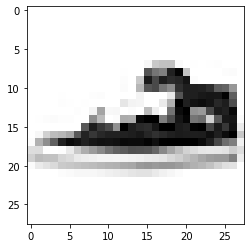

In [8]:
n = 153
print("這是", class_names[y_train[n]])
plt.imshow(x_train[n], cmap = 'Greys')

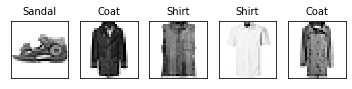

In [17]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap = 'Greys')

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()
model.add(Dense(112, input_dim=784, activation='relu'))
model.add(Dense(69, activation='relu'))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 112)               87920     
_________________________________________________________________
dense_1 (Dense)              (None, 69)                7797      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                700       
Total params: 96,417
Trainable params: 96,417
Non-trainable params: 0
_________________________________________________________________


In [32]:
train = model.fit(x_train, y_train, batch_size = 116, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0207 - acc: 0.8608
Epoch 2/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0205 - acc: 0.8622
Epoch 3/25
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0204 - acc: 0.8622
Epoch 4/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0202 - acc: 0.8637
Epoch 5/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0201 - acc: 0.8646
Epoch 6/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0200 - acc: 0.8653
Epoch 7/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0199 - acc: 0.8654
Epoch 8/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0197 - acc: 0.8674
Epoch 9/25
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0196 - acc: 0.8675
Epoch 10/25
60000/60000 [==============================] - 1s 25us/sample - loss: 

In [33]:
result = model.predict_classes(x_test)

神經網路預測是: Sandal


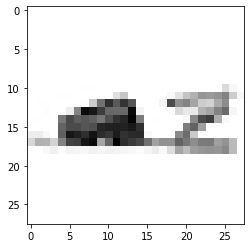

In [34]:
n = 420

print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')